# Morphological Operators

- Sets of Kernels that can achieve a variety of effects(e.g. reducing noise).
- The basic morphological operators are `erosion, dilation, opening and closing`.
- Dilation - grow image regions
- Erosion - shrink image regions
- Opening - structured removal of image region boundary pixels
- Closing - structured filling in of image region boundary pixels
- Hit and Miss Transform - image pattern matching and marking
- Thinning - structured erosion using image pattern matching
- Thickening - structured dilation using image pattern matching
- Skeletonization/Medial Axis Transform - finding skeletons of binary regions

Morphological operators often take a binary image and a structuring element as input and combine them using a set operator (intersection, union, inclusion, complement). They process objects in the input image based on characteristics of its shape, which are encoded in the structuring element. 
    
> Mathematical morphology (MM) is a theory and technique for the analysis and processing of geometrical structures, based on set theory, lattice theory, topology, and random functions. MM is most commonly applied to digital images, but it can be employed as well on graphs, surface meshes, solids, and many other spatial structures. - wikipedia

**Operators :**
- Reducing black points on a white background ( & Vice Varsa)
- Erosion and dialation effects that can add or erode from an existing Image.

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

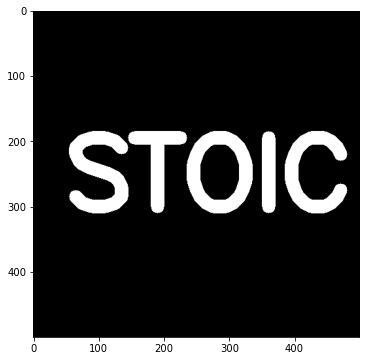

In [56]:
def gen_img():
    img = np.zeros((500,500))
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img, text='STOIC'
               , org=(50,300)
               , fontFace=font
               , fontScale=5
               , color=(255,255,255)
               , thickness=20 )
    return img

def display_img(img):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
img = gen_img()
display_img(img)

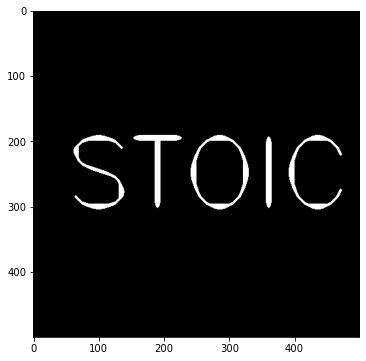

In [57]:
# Erosion: Erodes boundaries of foreground objects
img = gen_img()
kernel = np.ones((5,5), dtype=np.uint8)

results = cv.erode(img, kernel, iterations=3)
display_img(results)

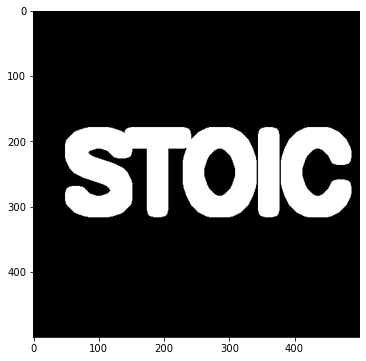

In [62]:
# Dilation
img = gen_img()
kernel = np.ones((5,5), dtype=np.uint8)

dilation = cv.dilate(img,kernel,iterations = 3)

display_img(dilation)


Removal of Noise :



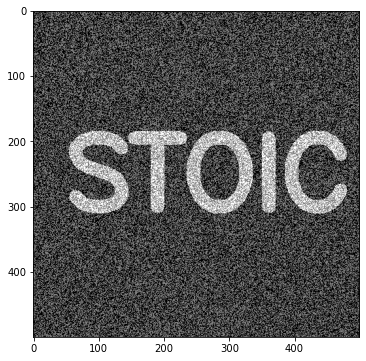

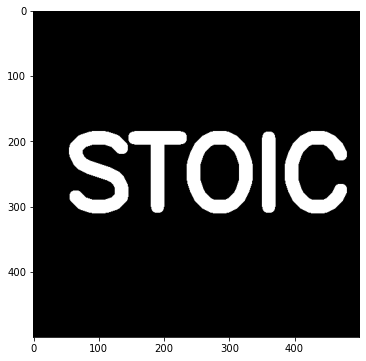

In [63]:
# Opening : Erosion followed by Dilation

# Noise Generation
img = gen_img()
white_noise = np.random.randint(low=0, high=2, size=(500,500))*255 # scaling with original image
img_noise = white_noise + img
display_img(img_noise)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
print('\nRemoval of Noise :\n')
display_img(opening)

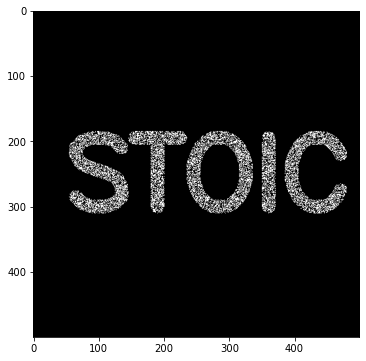

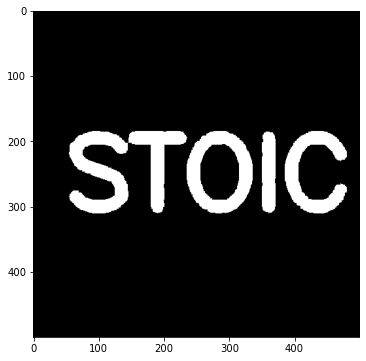

In [64]:
# Closing 
# Foreground Noise
img = gen_img()
black_noise = np.random.randint(low=0, high=2, size=(500,500))*-255 # scaling with original image

img_noise = black_noise + img
img_noise[img_noise==-255] = 0
display_img(img_noise)

closing = cv.morphologyEx(img_noise, cv.MORPH_CLOSE, kernel)
display_img(closing)


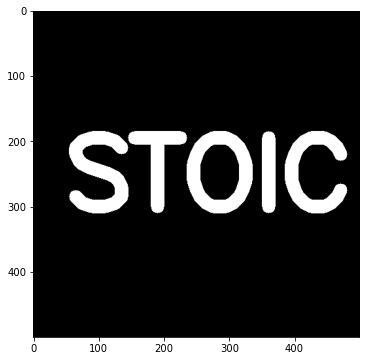

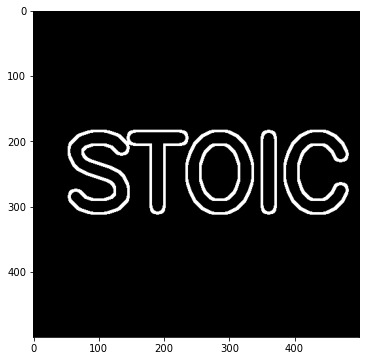

In [67]:
# Morphological Gradient(Difference b/w dilation and erosion )
img = gen_img()
display_img(img)

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
display_img(gradient)

***